In [1]:
import pandas as pd

df= pd.read_csv("/Users/filipecarvalho/Documents/data_science_projects/DMT1_methylation/df_GSE142512.csv")

In [2]:
df.head()

,Unnamed: 0,Array,platform,subject_ID,group,age,split_c.time_point,split_c.gender,genes,value
0,1,200090280086R01C01,GSM4230846,00246-0,control,6.6940452yrs,4,Male,cg00002531,4.260242
1,2,200090280086R03C01,GSM4230847,01009-0,control,6.0150582yrs,4,Female,cg00002531,4.115136
2,3,200090280086R04C01,GSM4230848,00018-0,case,7.0937714yrs,4,Female,cg00002531,4.349310
3,4,200090280086R05C01,GSM4230849,00040-0,case,6.7159480yrs,4,Male,cg00002531,4.298517
4,5,200123460093R01C02,GSM4230863,12590-0,case,1.2867899yrs,2,Female,cg00002531,4.189572


In [4]:
df.shape

(490728, 10)

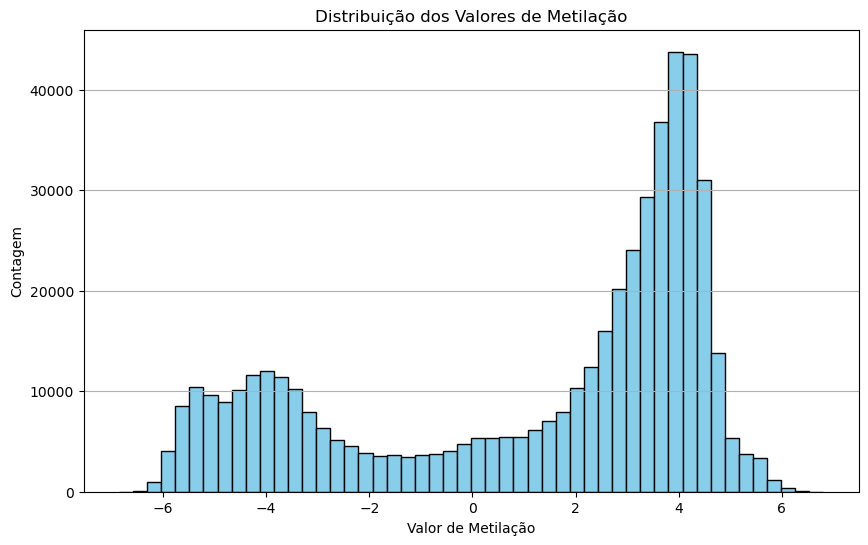

In [13]:
import matplotlib.pyplot as plt

# Histograma dos valores de metilação
plt.figure(figsize=(10, 6))
plt.hist(df['value'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Valores de Metilação')
plt.xlabel('Valor de Metilação')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()


In [14]:
# Verificar a quantidade de valores ausentes em cada coluna
missing_values = df.isnull().sum()

missing_values


Unnamed: 0            0
Array                 0
platform              0
subject_ID            0
group                 0
age                   0
split_c.time_point    0
split_c.gender        0
genes                 0
value                 0
dtype: int64

In [17]:
# Converter a coluna 'age' para formato numérico removendo 'yrs' e convertendo para float
df['age_numeric'] = df['age'].str.replace('yrs', '').astype(float)

# Calcular a correlação entre 'value' e 'age_numeric'
correlation = df['value'].corr(df['age_numeric'])

correlation


-0.01052815155580173

<Figure size 1000x600 with 0 Axes>

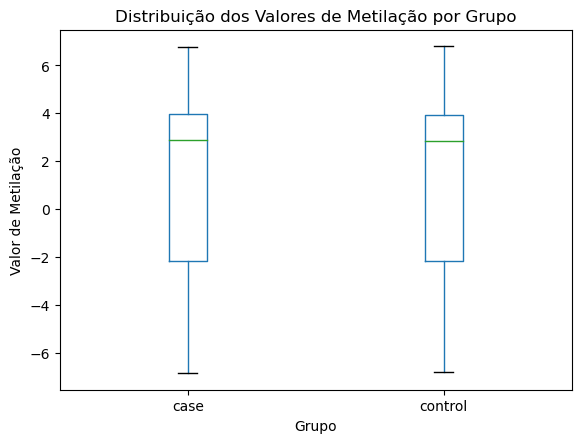

In [18]:
# Boxplot para comparar valores de metilação entre os grupos
plt.figure(figsize=(10, 6))
df.boxplot(column='value', by='group', grid=False)
plt.title('Distribuição dos Valores de Metilação por Grupo')
plt.suptitle('')  # Remover o título automático gerado pelo pandas
plt.xlabel('Grupo')
plt.ylabel('Valor de Metilação')
plt.show()


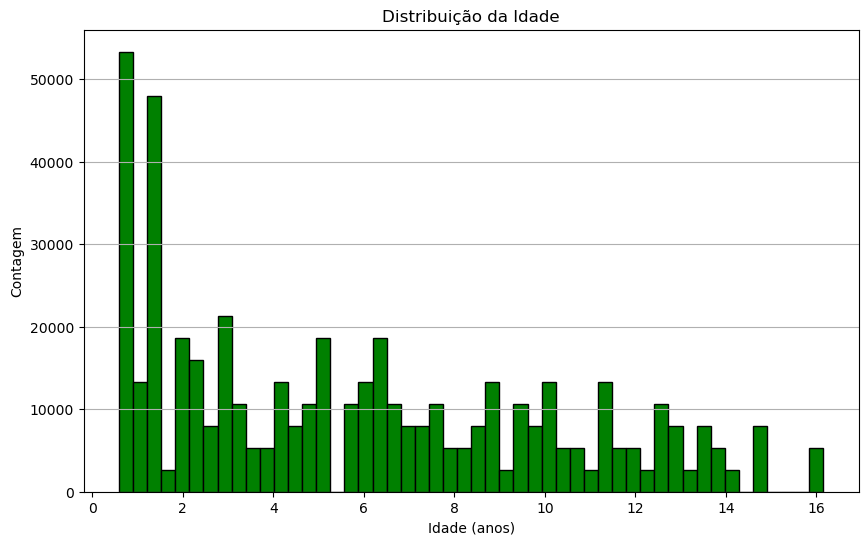

In [19]:
# Histograma da distribuição da idade
plt.figure(figsize=(10, 6))
plt.hist(df['age_numeric'], bins=50, color='green', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
plt.grid(axis='y')
plt.show()


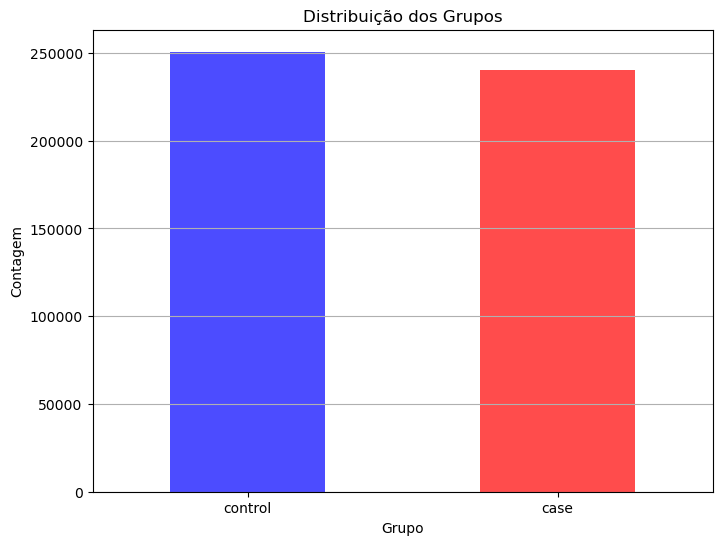

In [20]:
# Visualizar a distribuição dos grupos
group_counts = df['group'].value_counts()

plt.figure(figsize=(8, 6))
group_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.title('Distribuição dos Grupos')
plt.xlabel('Grupo')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


<Figure size 1000x600 with 0 Axes>

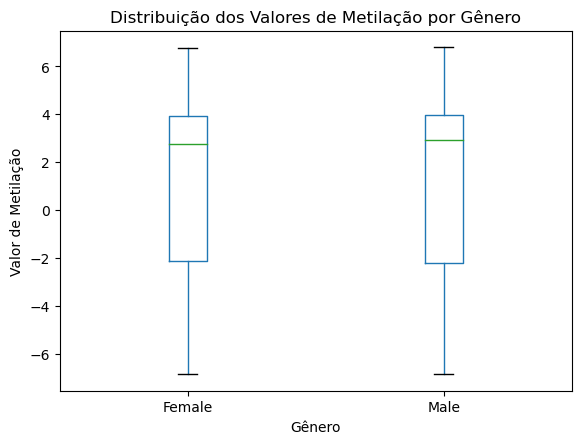

In [21]:
# Boxplot para comparar valores de metilação entre os gêneros
plt.figure(figsize=(10, 6))
df.boxplot(column='value', by='split_c.gender', grid=False)
plt.title('Distribuição dos Valores de Metilação por Gênero')
plt.suptitle('')  # Remover o título automático gerado pelo pandas
plt.xlabel('Gênero')
plt.ylabel('Valor de Metilação')
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Separar os dados dos grupos "control" e "case"
control_group = df[df['group'] == 'control']
case_group = df[df['group'] == 'case']

# Lista para armazenar os resultados
results = []

# Realizar teste t para cada gene
for gene in df['genes'].unique():
    control_values = control_group[control_group['genes'] == gene]['value']
    case_values = case_group[case_group['genes'] == gene]['value']
    
    t_stat, p_value = ttest_ind(control_values, case_values, equal_var=False)
    
    results.append({'gene': gene, 't_stat': t_stat, 'p_value': p_value})

# Criar um DataFrame com os resultados
df_results = pd.DataFrame(results)

# Ordenar os resultados pelo valor de p
df_results = df_results.sort_values(by='p_value')

df_results.head()


,gene,t_stat,p_value
1162,cg10006887,-4.806394,0.000003
1917,cg18862502,-4.604090,0.000008
1467,cg13677859,-4.265519,0.000032
1534,cg14399060,4.261734,0.000033
709,cg05865548,-3.895945,0.000138


In [23]:
from statsmodels.stats.multitest import multipletests

# Ajustar os valores de p usando o método de Benjamini-Hochberg
df_results['adjusted_p_value'] = multipletests(df_results['p_value'], method='fdr_bh')[1]

# Selecionar genes diferencialmente expressos com base em um limite de FDR de 0,05
differentially_expressed_genes = df_results[df_results['adjusted_p_value'] < 0.05]

differentially_expressed_genes


,gene,t_stat,p_value,adjusted_p_value
1162,cg10006887,-4.806394,0.000003,0.008558
1917,cg18862502,-4.604090,0.000008,0.010455
1467,cg13677859,-4.265519,0.000032,0.022044
1534,cg14399060,4.261734,0.000033,0.022044


In [24]:
differentially_expressed_genes.shape

(4, 4)

In [25]:
# Criar o conteúdo do arquivo README

readme_content = """
# Longitudinal DNA methylation differences precede type 1 diabetes

## Organism
Homo sapiens

## Experiment type
Methylation profiling by genome tiling array

## Summary
DNA methylation may be involved in development of type 1 diabetes (T1D), but previous epigenome-wide association studies were conducted among cases with clinically diagnosed diabetes. Using multiple pre-disease peripheral blood samples on the Illumina 450K and EPIC platforms, we investigated longitudinal methylation differences between 87 T1D cases and 87 controls from the prospective Diabetes Autoimmunity Study in the Young (DAISY) cohort. Change in methylation with age differed between cases and controls in 10 regions. Average longitudinal methylation differed between cases and controls at two genomic positions and 28 regions. Some methylation differences were detectable and consistent as early as birth, including before and after the onset of preclinical islet autoimmunity. Results map to transcription factors, other protein coding genes, and non-coding regions of the genome with regulatory potential. The identification of methylation differences that predate islet autoimmunity and clinical diagnosis may suggest a role for epigenetics in T1D pathogenesis.

## Overall design
There are a total of 87 T1D cases and 87 T1D controls. Each subject has somewhere between 1 and 5 time points collected. There are no technical replicates included in the final analyzed dataset.

## Contact
[Your contact information or link to profile]

## License
[Your preferred license or "License information to be added."]
"""

# Salvar o conteúdo em um arquivo README.md
readme_file_path = "/Users/filipecarvalho/Documents/data_science_projects/DMT1_methylation/README.md"
with open(readme_file_path, 'w') as file:
    file.write(readme_content)

readme_file_path


'/Users/filipecarvalho/Documents/data_science_projects/DMT1_methylation/README.md'